In [ ]:
# importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import statistics as st

In [ ]:
# importar o dataset
df = pd.read_csv('2019-Nov (2).csv')

In [ ]:
# Verificar primeiras linhas do dataset
df.head()


In [ ]:
# Verificar estatísticas do dataset
df.describe()


In [ ]:
# Verificar tamanho (Linha x Colunas)
df.shape

In [ ]:
# Agrupar valores (user_session, event_type, product_id, event_time por user_session para
# verificar a quantidade de eventos por sessão)
df.groupby(['user_session', 'event_type', 'product_id', 'event_time']).size().reset_index(name='count')

In [ ]:
# verificar se existem valores duplicados
df.duplicated().sum()

In [7]:

df[df.apply(tuple, 1).duplicated()].shape

(246693, 9)

In [ ]:
~df.apply(df.duplicated()).any(axis=1).sum()

In [4]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
4635832    False
4635833    False
4635834    False
4635835    False
4635836    False
Length: 4635837, dtype: bool

In [9]:

# Executar o tratamento de duplicatas

df.drop_duplicates(inplace=True)

In [10]:
# Verificar tamanho do dataset retirando as duplicatas antes de executar a ação 
df.shape

(4389144, 9)

In [11]:
# Agrupar valores (user_session, event_type, product_id, event_time por user_session para verificar se as duplicatas foram removidas
df.groupby(['user_session', 'event_type', 'product_id', 'event_time']).size().reset_index(name='count')

,user_session,event_type,product_id,event_time,count
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,view,5829298,2019-11-05 07:57:05 UTC,1
1,00001bc6-1e04-4861-be5d-1bc73929c21a,view,5771614,2019-11-11 12:15:10 UTC,1
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,view,5568472,2019-11-15 03:50:03 UTC,1
3,00004c7d-9507-474e-a559-0fdaccaaa390,view,5864850,2019-11-13 04:37:37 UTC,1
4,0000597b-de39-4a77-9fe5-02c8792ca14e,view,5861591,2019-11-14 04:02:03 UTC,1
...,...,...,...,...,...
4388384,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,view,5588154,2019-11-27 09:26:21 UTC,1
4388385,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,view,5676246,2019-11-27 09:27:35 UTC,1
4388386,ffff8044-2a22-4846-8a72-999e870abbe9,view,5847328,2019-11-09 17:02:14 UTC,1
4388387,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,view,5528034,2019-11-02 11:47:34 UTC,1


In [12]:
df.event_time = pd.to_datetime(df.event_time)

In [13]:
df.event_time.describe()

/tmp/ipykernel_20675/2429475058.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.event_time.describe()


count                       4389144
unique                      1810735
top       2019-11-18 01:17:08+00:00
freq                            279
first     2019-11-01 00:00:02+00:00
last      2019-11-30 23:59:58+00:00
Name: event_time, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389144 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 334.9+ MB


In [17]:
# Verificar se existem valores nulos
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4315582
brand            1879959
price                  0
user_id                0
user_session         755
dtype: int64

In [18]:
# remover valores nulos
df.dropna(inplace=True)

In [20]:
df.shape

(54865, 9)

In [22]:
# Calcular quartis 1%, 10%, 25%, 50%, 75%, 99%, max, min
df.quantile([0.01, 0.1, 0.25, 0.5, 0.75, 0.99, 1, 0])

,product_id,category_id,price,user_id
0.01,5395.0,1.487580e+18,1.27,233010460.0
0.10,5732026.0,1.487580e+18,1.98,396900827.0
0.25,5767493.0,1.487580e+18,4.16,476611021.0
0.50,5854573.0,1.487580e+18,24.44,548205195.0
0.75,5868559.0,1.487580e+18,62.70,568830332.0
0.99,5901987.0,2.193075e+18,150.79,579188445.0
1.00,5907080.0,2.193075e+18,150.79,579961417.0
0.00,5395.0,1.487580e+18,0.94,20554973.0


In [27]:
# Calcular IQR de 75% - 25%
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR


product_id     1.010660e+05
category_id    6.702497e+09
price          5.854000e+01
user_id        9.221931e+07
dtype: float64

In [28]:
# Calcular lower_bound de 25% - 1.5*IQR
lower_bound = df.quantile(0.25) - (1.5 * IQR)

In [30]:
# Calcular upper_bound de 75% + 1.5*IQR
upper_bound = df.quantile(0.75) + (1.5 * IQR)

In [31]:
print(lower_bound)
print(upper_bound)

product_id     5.615894e+06
category_id    1.487580e+18
price         -8.365000e+01
user_id        3.382821e+08
dtype: float64
product_id     6.020158e+06
category_id    1.487580e+18
price          1.505100e+02
user_id        7.071593e+08
dtype: float64


In [32]:
# Comparar valores com o descri percentiles de todos os valores calculados 
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.99, 1, 0])

,product_id,category_id,price,user_id
count,5.486500e+04,5.486500e+04,54865.000000,5.486500e+04
mean,5.522524e+06,1.614899e+18,37.374772,5.111918e+08
std,1.299684e+06,2.469364e+17,35.674730,8.289645e+07
min,5.395000e+03,1.487580e+18,0.940000,2.055497e+07
0%,5.395000e+03,1.487580e+18,0.940000,2.055497e+07
1%,5.395000e+03,1.487580e+18,1.270000,2.330105e+08
10%,5.732026e+06,1.487580e+18,1.980000,3.969008e+08
25%,5.767493e+06,1.487580e+18,4.160000,4.766110e+08
50%,5.854573e+06,1.487580e+18,24.440000,5.482052e+08
75%,5.868559e+06,1.487580e+18,62.700000,5.688303e+08


In [33]:
#Conferir se existem valores nulos na coluna event_type

df.event_type.isnull().sum()


0

In [34]:
# Definir x do gráfico → df['event_type'].value_counts().index e y do gráfico → df['event_type'].value_counts().values
x = df['event_type'].value_counts().index
y = df['event_type'].value_counts().values


/home/valdir/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


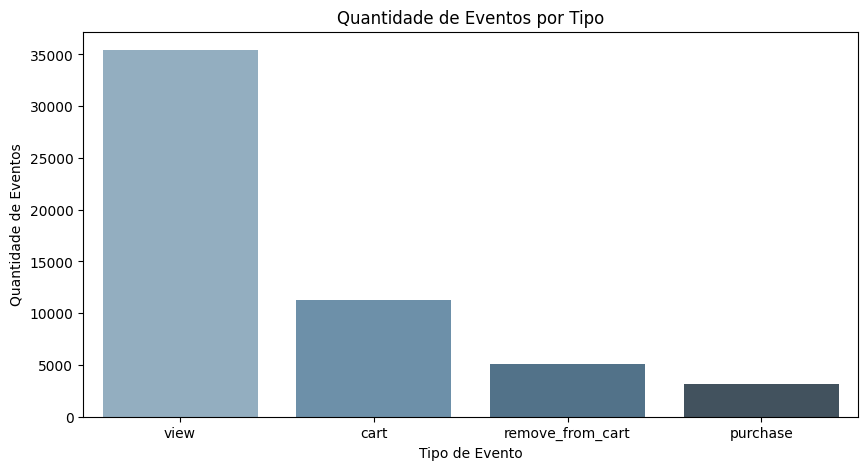

In [36]:
# Definir tamanho da figura (largura, altura)
plt.figure(figsize=(10, 5))
# Definir título do gráfico
plt.title('Quantidade de Eventos por Tipo')
# Definir rótulo do eixo x
plt.xlabel('Tipo de Evento')
# Definir rótulo do eixo y
plt.ylabel('Quantidade de Eventos')
# Plotar gráfico sns.barplot(x, y, saturation= aluno escolhe, order=[ 'view', ‘cart', , 'remove_from_cart', 'purchase'], palette= aluno escolhe) 
sns.barplot(x, y, saturation=0.5, order=['view', 'cart', 'remove_from_cart', 'purchase'], palette='Blues_d');


In [ ]:
# Verificar a quantidade de marcas mais vendidas
df['brand'].value_counts().head(5)

In [42]:
# Redefinir colunas (Brand e Quantidade) para plotar o gráfico
df_brand = df['brand'].value_counts().head(5).reset_index()
# Filtrar as 5 marcas mais vendidas
df_brand = df_brand[df_brand['brand'] > 1000]
# Transformar em um frame
df_brand = pd.DataFrame(df_brand)
# Plotar o gráfico com as 5 marcas mais vendidas
fig = px.bar(df_brand, x='index', y='brand', color='brand', title='Quantidade de Eventos por Marca')
fig.show()
